In [20]:
from gensim.models import Word2Vec
from gensim.models import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap



In [21]:
# model_100d_5e = Word2Vec.load("../Data/best_model_100_dim_5e.model")
# model_300d = Word2Vec.load("../Data/Models/best_model_new.model")
# model = Word2Vec.load("../Data/model_10000e_100d_lowest_loss.model")
model = Word2Vec.load("../Data/model_5e_100d.model")

In [28]:
model.wv.similar_by_key('Rued Langgaards Vej')

[('Krokodillegade', 0.941950261592865),
 ('Gunløgsgade', 0.929219663143158),
 ('Smørumvej', 0.9236794114112854),
 ('Dæmningen', 0.9234192967414856),
 ('Vennemindevej', 0.9221628308296204),
 ('Fælledparken Skatepark', 0.9207092523574829),
 ('Mosesvinget', 0.9200780391693115),
 ('Det Nye Emdrupborg Kollegium', 0.9198076128959656),
 ('Dyssegårdsvej', 0.918389618396759),
 ('Adolph Steens Alle', 0.9172426462173462)]

In [31]:
names   = ['Rued Langgaards Vej', 
          'København H',
         'København H (Metro)', 
         'Nørreport St. (Metro)', 
         'Nørreport St.'
        ]

vectors = np.concatenate((model.wv["Rued Langgaards Vej"], 
                         model.wv['København H'],
                         model.wv['København H (Metro)'],
                         model.wv['Nørreport St. (Metro)'],
                         model.wv['Nørreport St.']
                        ), axis=0)

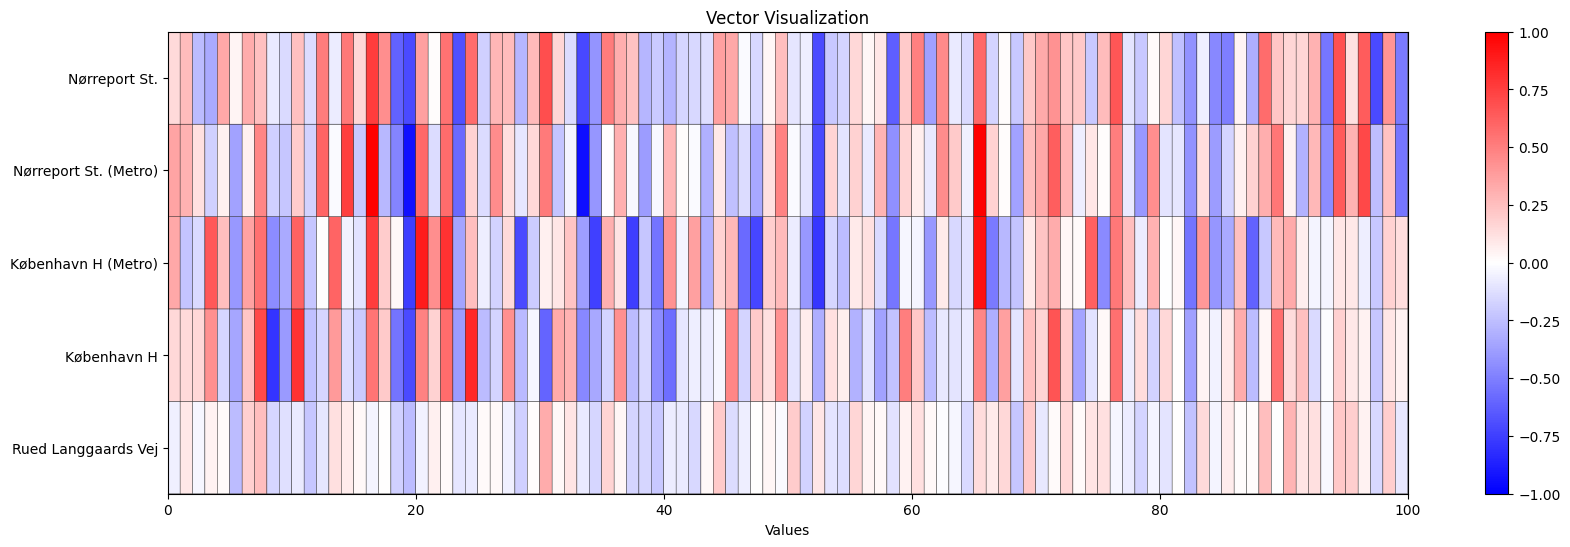

In [32]:
colors = [(0, 'blue'), (0.5, 'white'), (1, 'red')]
cmap = LinearSegmentedColormap.from_list('Color_map', colors)

# Create a figure and a single subplot
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

# Create a pseudocolor plot with a single row (corresponding to the vector) and 10 columns
c = ax.pcolor(vectors.reshape(len(names), -1), cmap=cmap, vmin=-1, vmax=1, edgecolors='k')

# Set the ticks and labels for the y-axis
ax.set_yticks(np.arange(len(names)) + 0.5)
ax.set_yticklabels(names)

# Set the title and labels
ax.set_title('Vector Visualization')
ax.set_xlabel('Values')

# Show the colorbar
plt.colorbar(c, ax=ax)

# Display the plot
plt.show()


In [45]:
names_metro = []

vectors_metro = []

for location in model.wv.index_to_key:
    if location.__contains__("(Metro)"):
        names_metro.append(location)
        vectors_metro.append(model.wv[location])

for location in model.wv.index_to_key:
    if location.__contains__("St.") and location not in names_metro :
        names_metro.append(location)
        vectors_metro.append(model.wv[location])


vectors_metro = np.array(vectors_metro)

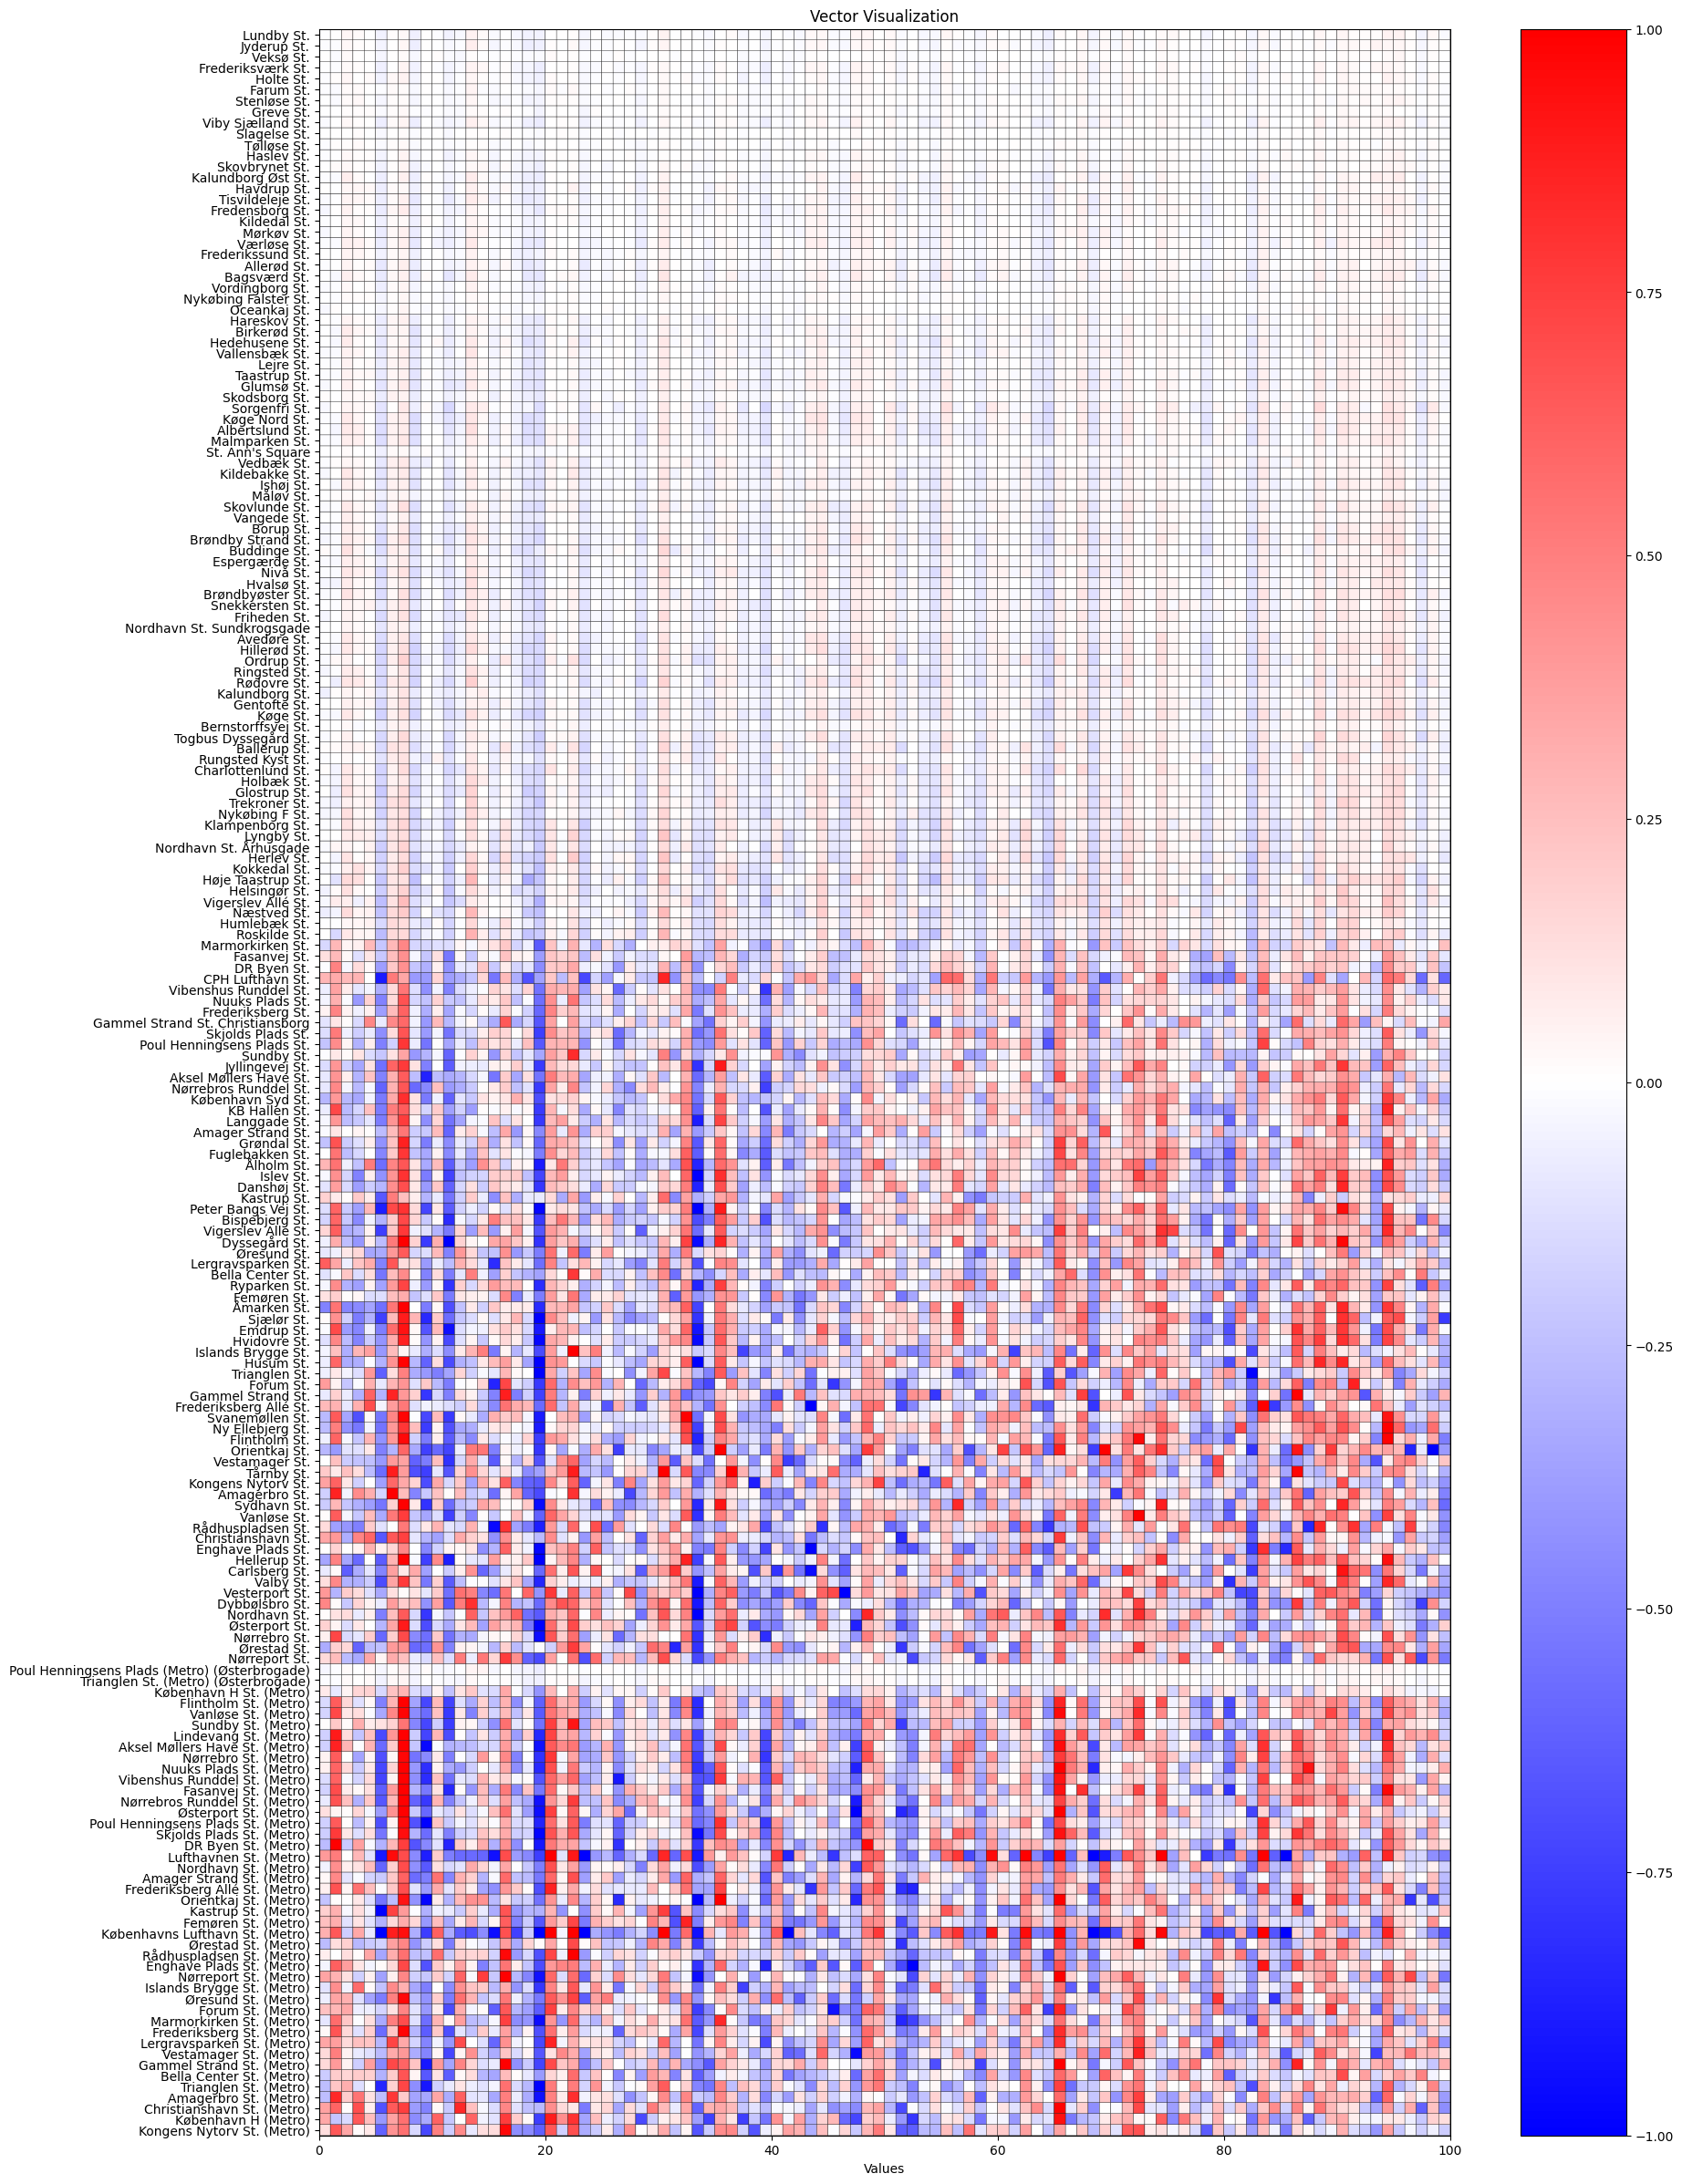

In [70]:
colors = [(0, 'blue'), (0.5, 'white'), (1, 'red')]
cmap = LinearSegmentedColormap.from_list('Color_map', colors)

# Create a figure and a single subplot
fig, ax = plt.subplots(1, 1, figsize=(20, 30))

# Create a pseudocolor plot with a single row (corresponding to the vector) and 10 columns
c = ax.pcolor(vectors_metro.reshape(len(names_metro), -1), cmap=cmap, vmin=-1, vmax=1, edgecolors='k')

# Set the ticks and labels for the y-axis
ax.set_yticks(np.arange(len(names_metro)) + 0.5)
ax.set_yticklabels(names_metro)

# Set the title and labels
ax.set_title('Vector Visualization')
ax.set_xlabel('Values')

# Show the colorbar
plt.colorbar(c, ax=ax)

# Display the plot
plt.show()

In [73]:
names_similar_Rued = []
vectors_similar_Rued = []


for similar in model.wv.most_similar('Æblehaven'):
    location = similar[0]
    names_similar_Rued.append(location)
    vectors_similar_Rued.append(model.wv[location])

vectors_similar_Rued = np.array(vectors_similar_Rued)

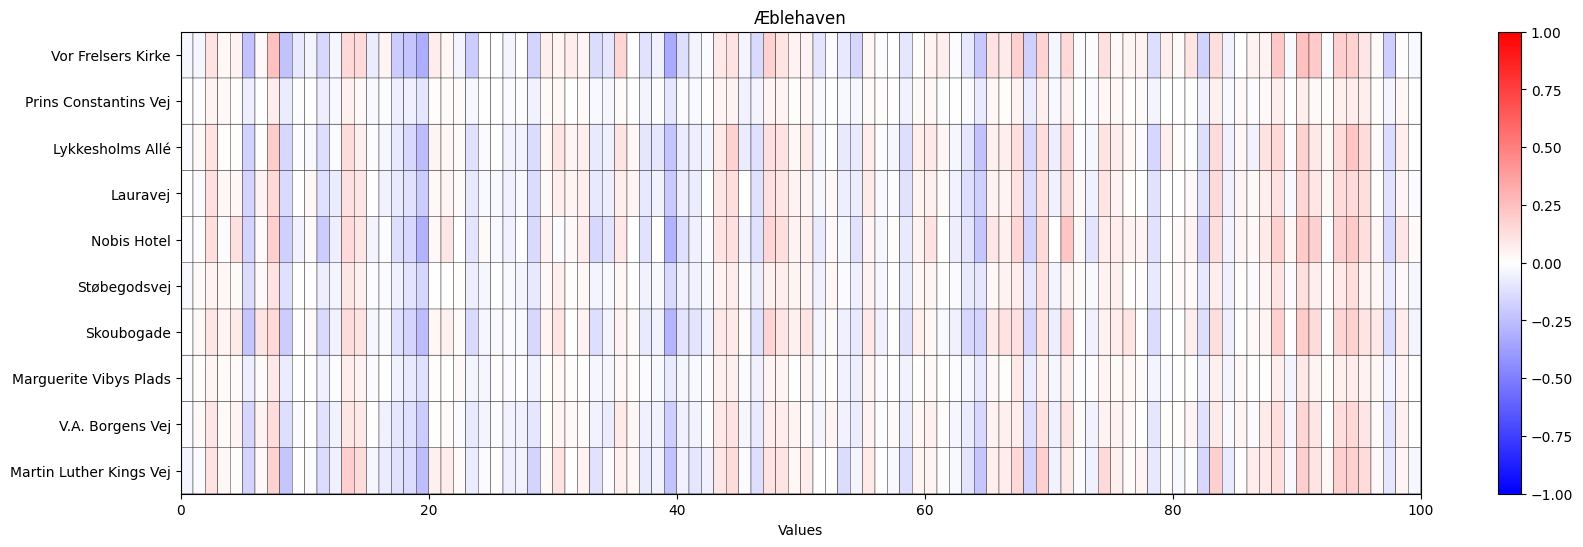

In [75]:
colors = [(0, 'blue'), (0.5, 'white'), (1, 'red')]
cmap = LinearSegmentedColormap.from_list('Color_map', colors)

# Create a figure and a single subplot
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

# Create a pseudocolor plot with a single row (corresponding to the vector) and 10 columns
c = ax.pcolor(vectors_similar_Rued.reshape(len(names_similar_Rued), -1), cmap=cmap, vmin=-1, vmax=1, edgecolors='k')

# Set the ticks and labels for the y-axis
ax.set_yticks(np.arange(len(names_similar_Rued)) + 0.5)
ax.set_yticklabels(names_similar_Rued)

# Set the title and labels
ax.set_title('Æblehaven')
ax.set_xlabel('Values')

# Show the colorbar
plt.colorbar(c, ax=ax)

# Display the plot
plt.show()

In [90]:
for l in model.wv.similar_by_key('Æblehaven', topn=4000):
        if l[0].__contains__("København"):
            print(l)
print("----")

for l in model.wv.similar_by_key('Rued Langgaards Vej', topn=4000):
        if l[0].__contains__("København"):
            print(l)

('Nationalmuseet i København', 0.923624575138092)
('Københavns Universitet', 0.8886058330535889)
('KUA - Københavns Universitet Amager', 0.8730189204216003)
('Københavns Naturskole', 0.8705061674118042)
('IT-Universitetet i København', 0.8599233031272888)
('Aalborg Universitet København', 0.8550131916999817)
('Københavns Professionshøjskole', 0.8534470200538635)
('Københavns Professionshøjskole - Campus Carlsberg', 0.8496721386909485)
('Københavns Fisketorv', 0.8308351635932922)
('Københavns Museum', 0.8244691491127014)
('Københavns Turistinformation', 0.8236283659934998)
('København', 0.8176562190055847)
('Københavns åbne Gymnasium', 0.7991507649421692)
('København Kastrup', 0.7653722167015076)
('Københavns Rådhus', 0.7541428804397583)
('Københavns Lufthavn Kastrup Terminal', 0.679044783115387)
('København Syd St.', 0.5618875026702881)
('København H St. (Metro)', 0.49668169021606445)
('København H', 0.4670164883136749)
('København H (Metro)', 0.38968324661254883)
('Københavns Lufthavn

In [91]:
model.window

1

In [93]:
model_5w = Word2Vec.load('../Data/model_5e_100d_5w.model')

In [95]:
model_5w.shrink_windows

True